### Top 50 Tracks list in Spotify 2020 analysis

In [1]:
# Importing libraries and loading data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

df = pd.read_csv('spotifytoptracks.csv', index_col=0)
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


#### How many observations are there in this dataset and how many features this dataset has?

In [2]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 50 observations and 16 features.


#### Which of the features are categorical and which are numerical?

* Categorical: Artist, Album, Track Name, Track ID, Key, Tempo, Genre
* Numerical: Energy, Danceability, loudness, acousticness, speechiness, instrumentalness, leveness, valence, duration ms 


In [84]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'energy', 'danceability',
       'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

#### Handling missing values, checking duplicates and treating outliers

In [3]:
# Checking if there is any null value in the dataset
df.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

In [4]:
# Checking if there is any duplicate in the dataset

df.duplicated().any()

False

To treat the outliers we are going to check the distribution of the data for the following features using a box plot from matplitlib inline. 

* #### Energy
Measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* #### Danceability
Measured from 0.0 to 1.0 represents how suitable a track is for dancing based on a combination of  musical elements including tempo, rhythm stability, beat strength, and overall regularity.
* #### Loudness
The overall loudness of a track in decibels. Values typically range between -60 and 0 db
* #### Acousticness
Measured from 0.0 to 1.0 Predicts whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* #### Speechiness
Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values below 0.33 most likely represent music and other non-speech-like tracks.
* #### Instrumentalness
Measured from 0.0 to 1.0. Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* #### Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. > 0.8 High probability that the track is recorded live.
* #### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High Valence - high positivity.
* #### Duration-ms
The duration of the track in milliseconds.

We will print the min and max value to identify easily the outlier. 
For the features that has a fixed measure we want to identify those that are out of range.

(24, 0.225)
(35, 0.855)


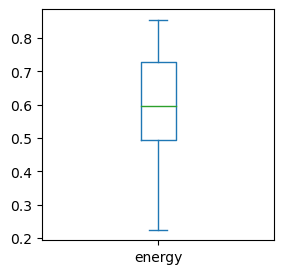

In [64]:
%matplotlib inline
df.energy.plot.box(figsize=(3,3))
print((df.energy.idxmin(), df.energy.min()))
print((df.energy.idxmax(), df.energy.max()))

(44, 0.351)
(27, 0.935)


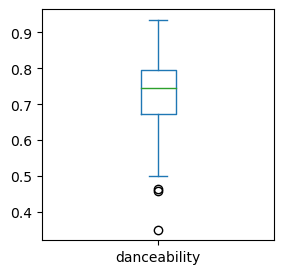

In [65]:
df.danceability.plot.box(figsize=(3,3))
print((df.danceability.idxmin(), df.danceability.min()))
print((df.danceability.idxmax(), df.danceability.max()))

(24, -14.454)
(10, -3.28)


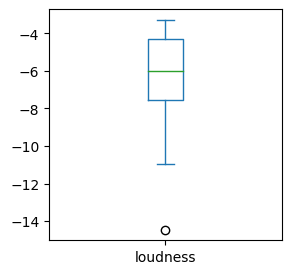

In [66]:
df.loudness.plot.box(figsize=(3,3))
print((df.loudness.idxmin(), df.loudness.min()))
print((df.loudness.idxmax(), df.loudness.max()))

(0, 0.00146)
(44, 0.934)


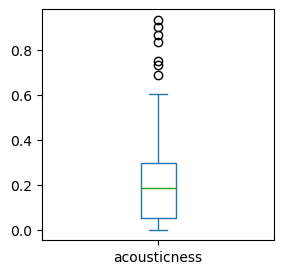

In [67]:
df.acousticness.plot.box(figsize=(3,3))
print((df.acousticness.idxmin(), df.acousticness.min()))
print((df.acousticness.idxmax(), df.acousticness.max()))

(25, 0.029)
(19, 0.487)


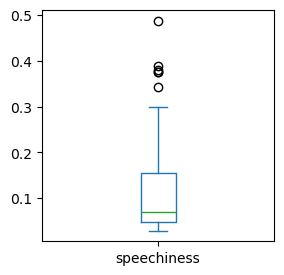

In [68]:
df.speechiness.plot.box(figsize=(3,3))
print((df.speechiness.idxmin(), df.speechiness.min()))
print((df.speechiness.idxmax(), df.speechiness.max()))

(2, 0.0)
(24, 0.657)


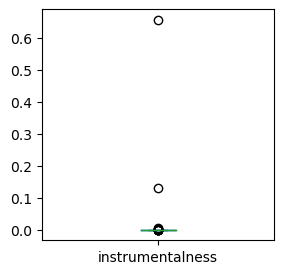

In [69]:
df.instrumentalness.plot.box(figsize=(3,3))
print((df.instrumentalness.idxmin(), df.instrumentalness.min()))
print((df.instrumentalness.idxmax(), df.instrumentalness.max()))

(10, 0.0574)
(41, 0.792)


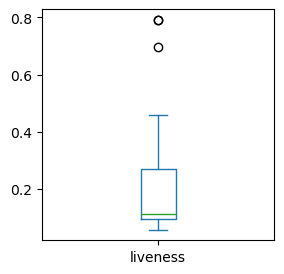

In [70]:
df.liveness.plot.box(figsize=(3,3))
print((df.liveness.idxmin(), df.liveness.min()))
print((df.liveness.idxmax(), df.liveness.max()))

(36, 0.0605)
(37, 0.925)


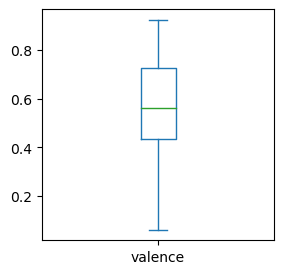

In [71]:
df.valence.plot.box(figsize=(3,3))
print((df.valence.idxmin(), df.valence.min()))
print((df.valence.idxmax(), df.valence.max()))

(23, 140526)
(49, 312820)


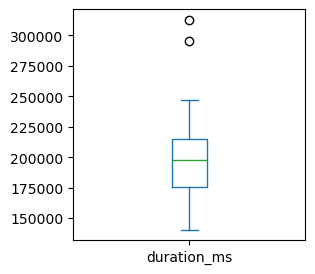

In [72]:
df.duration_ms.plot.box(figsize=(3,3))
print((df.duration_ms.idxmin(), df.duration_ms.min()))
print((df.duration_ms.idxmax(), df.duration_ms.max()))

#### Are there any artists that have more than 1 popular track? If yes, which and how many?

In [73]:
track_count = df.groupby(['artist'])['artist'].count().sort_values(ascending=False)
track_count .where(track_count  > 1).dropna()

artist
Travis Scott     3.0
Billie Eilish    3.0
Dua Lipa         3.0
Justin Bieber    2.0
Post Malone      2.0
Harry Styles     2.0
Lewis Capaldi    2.0
Name: artist, dtype: float64

#### Who was the most popular artist?

In [74]:
# Finding the artists with more tracks among the popular artists.

popular_artist = track_count.where(track_count  == track_count.max()).dropna()
popular_artist

artist
Travis Scott     3.0
Billie Eilish    3.0
Dua Lipa         3.0
Name: artist, dtype: float64

In [75]:
# From the popular artist we get the artist that its position is lower in the 50 Top tracks list

most_popular_artist = df[df["artist"].isin(popular_artist.index.tolist())].iloc[0]
print(f'The most popular artist is {most_popular_artist.artist} with {popular_artist[most_popular_artist.artist]} tracks and lower position in the track list.')

The most popular artist is Dua Lipa with 3.0 tracks and lower position in the track list.


#### How many artists in total have their songs in the top 50?

In [76]:
print(f'{len(df.artist.unique())} artist in total have their song in the top 50 Spotify tracks.')

40 artist in total have their song in the top 50 Spotify tracks.


#### Are there any albums that have more than 1 popular track? If yes, which and how many?

In [77]:
track_count = df.groupby(['album'])['album'].count().sort_values(ascending=False)
track_count.where(track_count  > 1).dropna()

album
Future Nostalgia        3.0
Fine Line               2.0
Hollywood's Bleeding    2.0
Changes                 2.0
Name: album, dtype: float64

In [78]:
print(f'{len(df.album.unique())} albums in total have their songs in the top 50 Spotify tracks.')

45 albums in total have their songs in the top 50 Spotify tracks.


#### Which tracks have a danceability score above 0.7?

In [95]:
df[df['danceability'] > 0.7].head().sort_values(by='danceability', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.6880,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.0123,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.0149,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.2470,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap


#### Which tracks have a danceability score below 0.4?

In [96]:
df[df['danceability'] < 0.4].head().sort_values(by='danceability', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop


#### Which tracks have their loudness above -5?

In [97]:
df[df['loudness'] > -5].head().sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.2950,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop
12,Post Malone,Hollywood's Bleeding,Circles,21jGcNKet2qwijlDFuPiPb,0.762,0.695,0,-3.497,0.1920,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft Rock
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.1220,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.0123,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Before You Go,2gMXnyrvIjhVBUZwvLZDMP,0.575,0.459,3,-4.858,0.6040,0.0573,0.000000,0.0885,0.183,111.881,215107,Alternative/Indie


#### Which tracks have their loudness below -8?

In [98]:
df[df['loudness'] < -8].head().sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,0.481,0.767,0,-8.520,0.234,0.0803,0.000000,0.2690,0.761,150.076,171375,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.123,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.731,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
15,Drake,Dark Lane Demo Tapes,Toosie Slide,466cKvZn1j45IpxDdYZqdA,0.490,0.830,1,-8.820,0.289,0.2090,0.000003,0.1130,0.845,81.604,247059,Hip-Hop/Rap
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.902,0.0994,0.657000,0.1060,0.243,120.006,245426,Pop


#### Which track is the longest?

In [83]:
df.iloc[df['duration_ms'].idxmax()]

artist                        Travis Scott
album                           ASTROWORLD
track_name                      SICKO MODE
track_id            2xLMifQCjDGFmkHkpNLD9h
energy                                0.73
danceability                         0.834
key                                      8
loudness                            -3.714
acousticness                       0.00513
speechiness                          0.222
instrumentalness                       0.0
liveness                             0.124
valence                              0.446
tempo                              155.008
duration_ms                         312820
genre                          Hip-Hop/Rap
Name: 49, dtype: object

#### Which track is the shortest?

In [25]:
df.iloc[df['duration_ms'].idxmin()]

artist                            24kGoldn
album               Mood (feat. iann dior)
track_name          Mood (feat. iann dior)
track_id            3tjFYV6RSFtuktYl3ZtYcq
energy                               0.722
danceability                           0.7
key                                      7
loudness                            -3.558
acousticness                         0.221
speechiness                         0.0369
instrumentalness                       0.0
liveness                             0.272
valence                              0.756
tempo                               90.989
duration_ms                         140526
genre                              Pop rap
Name: 23, dtype: object

#### Which genre is the most popular?

In [47]:
popular_genre = df.groupby(['genre'])['genre'].count().sort_values(ascending=False)
popular_genre

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
 Electro-pop                           2
R&B/Soul                               2
Alternative/reggaeton/experimental     1
Chamber pop                            1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Hip-Hop/Trap                           1
Nu-disco                               1
Pop rap                                1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
Name: genre, dtype: int64

#### Which genres have just one song on the top 50?

In [27]:
popular_genre[popular_genre == 1]

genre
Alternative/reggaeton/experimental    1
Chamber pop                           1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: genre, dtype: int64

#### Which features are strongly positively correlated? Which features are strongly negatively correlated? Which features are not correlated?

Text(0.5, 1.0, 'Features correlation')

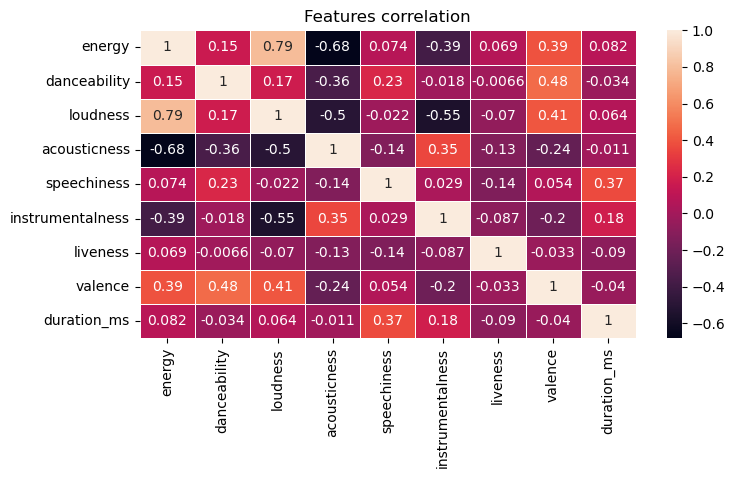

In [90]:
# Generate a heat map to visualize correlation between features using seaborn library imported below

import seaborn as sns

numerical_features = list(['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'duration_ms'])
correlation = df[numerical_features].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')

In [59]:
#correlation >= 0.8

In [60]:
#correlation < 0.8

In [61]:
#correlation < 0.1

* How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
* How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
* How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [62]:
selected_features = ['danceability', 'loudness', 'acousticness']
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

In [92]:
df.groupby(['genre'])[selected_features].aggregate(["mean", np.median, "max", "min"]).loc[selected_genres]

danceability                       loudness                 \
                          mean median    max    min      mean  median    max   
genre                                                                          
Pop                   0.677571  0.690  0.806  0.464 -6.460357 -6.6445 -3.280   
Hip-Hop/Rap           0.765538  0.774  0.896  0.598 -6.917846 -7.6480 -3.370   
Dance/Electronic      0.755000  0.785  0.880  0.647 -5.338000 -5.4570 -3.756   
Alternative/Indie     0.661750  0.663  0.862  0.459 -5.421000 -5.2685 -4.746   

                          acousticness                          
                      min         mean  median    max      min  
genre                                                           
Pop               -14.454     0.323843  0.2590  0.902  0.02100  
Hip-Hop/Rap        -8.820     0.188741  0.1450  0.731  0.00513  
Dance/Electronic   -7.567     0.099440  0.0686  0.223  0.01370  
Alternative/Indie  -6.401     0.583500  0.6460  0.751  0.29100